# CIDDS External Logs
###### Importing the required modules for the preprocessing and ignoring all warnings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings


warnings.filterwarnings('ignore')

###### Reading the first dataframe (Week 1) and understanding the structure

In [2]:
df1 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\ExternalServer\\CIDDS-001-external-week1.csv")
pd.set_option('display.max_columns', None)

print(df1.head(20))
print(df1.describe())
print(df1[df1["class"].isin(["suspicious"])])

            Date first seen    Duration  Proto    Src IP Addr  Src Pt  \
0   2017-03-14 17:43:57.172   81412.697  TCP       EXT_SERVER    8082   
1   2017-03-14 17:43:57.172   81412.697  TCP    OPENSTACK_NET   56978   
2   2017-03-14 17:43:26.135   81504.787  TCP       EXT_SERVER    8082   
3   2017-03-14 17:43:26.135   81504.787  TCP    OPENSTACK_NET   56979   
4   2017-03-14 18:17:09.005   82100.692  TCP       EXT_SERVER    8082   
5   2017-03-14 18:17:09.005   82100.692  TCP    OPENSTACK_NET   51649   
6   2017-03-14 19:46:37.327   83640.139  TCP       EXT_SERVER    8082   
7   2017-03-14 19:46:37.327   83640.139  TCP    OPENSTACK_NET   37039   
8   2017-03-14 19:02:42.704   86303.297  TCP       EXT_SERVER    8082   
9   2017-03-14 19:02:42.704   86303.297  TCP    OPENSTACK_NET   48380   
10  2017-03-14 20:17:17.014   87709.785  TCP       EXT_SERVER    8082   
11  2017-03-14 20:17:17.014   87709.785  TCP    OPENSTACK_NET   50807   
12  2017-03-14 17:44:10.042  183356.392  TCP       

###### Converting Date first seen into a recognisable datetime format and seeing change of flow rate

          Date first seen   Duration  Proto    Src IP Addr  Src Pt  \
0 2017-03-14 17:43:57.172  81412.697  TCP       EXT_SERVER    8082   
1 2017-03-14 17:43:57.172  81412.697  TCP    OPENSTACK_NET   56978   
2 2017-03-14 17:43:26.135  81504.787  TCP       EXT_SERVER    8082   
3 2017-03-14 17:43:26.135  81504.787  TCP    OPENSTACK_NET   56979   
4 2017-03-14 18:17:09.005  82100.692  TCP       EXT_SERVER    8082   

     Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos   class  \
0  OPENSTACK_NET  56978.0     3057     2.1 M      1  .AP...    0  normal   
1     EXT_SERVER   8082.0     4748     2.5 M      1  .AP...    0  normal   
2  OPENSTACK_NET  56979.0     8639     9.1 M      1  .AP...    0  normal   
3     EXT_SERVER   8082.0    12024    10.3 M      1  .AP...    0  normal   
4  OPENSTACK_NET  51649.0    11012    27.2 M      1  .AP.S.    0  normal   

  attackType attackID attackDescription  
0        ---      ---               ---  
1        ---      ---               --

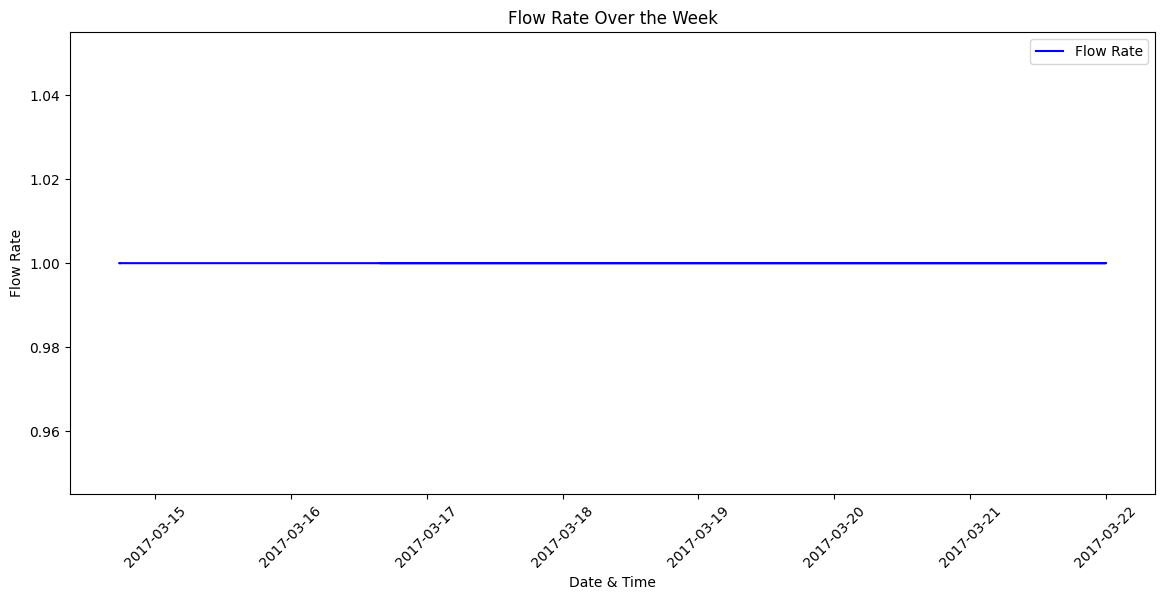

In [3]:
df1['Date first seen'] = pd.to_datetime(df1['Date first seen'])

plt.figure(figsize=(14, 6))
plt.plot(df1['Date first seen'], df1['Flows'], color='blue', label='Flow Rate')
print(df1.head())
plt.xlabel('Date & Time')
plt.ylabel('Flow Rate')
plt.title('Flow Rate Over the Week')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


###### Reading DataFrames Week 2,3,4

In [4]:
df2 =  pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\ExternalServer\\CIDDS-001-external-week2.csv")

In [5]:
df3 =  pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\ExternalServer\\CIDDS-001-external-week3.csv")

In [6]:
df4 =  pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\ExternalServer\\CIDDS-001-external-week4.csv")

In [7]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

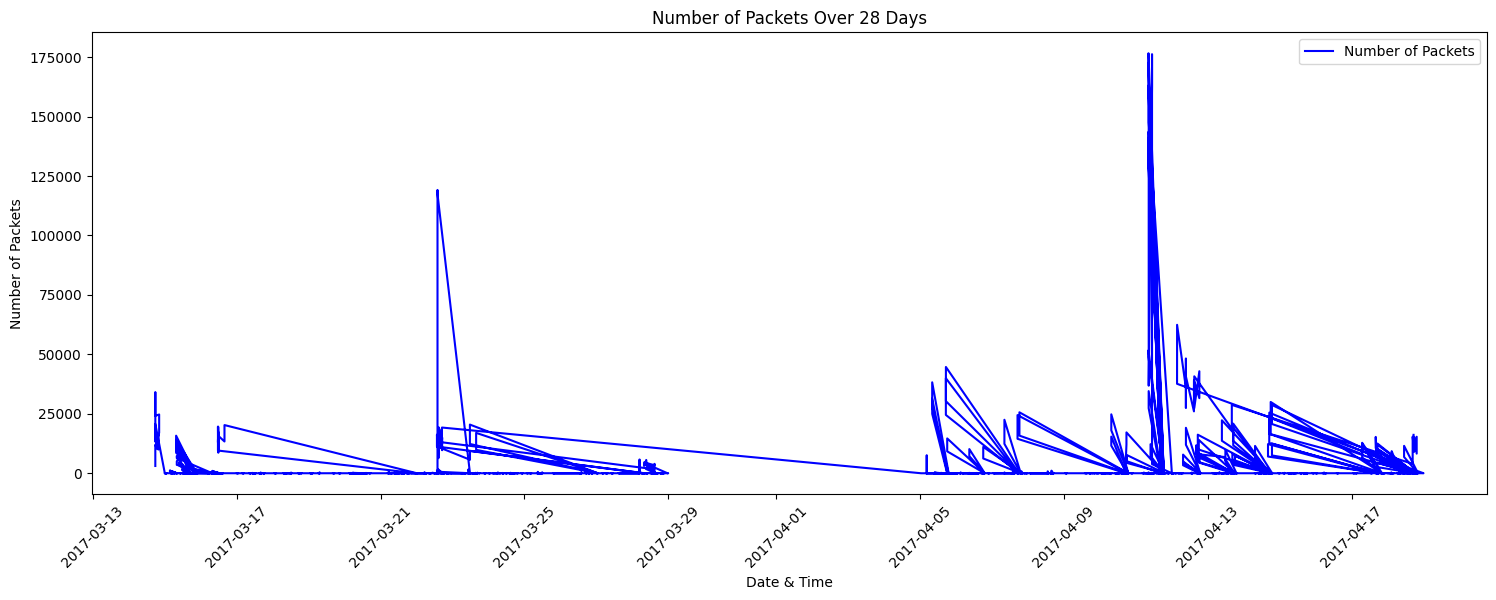

In [8]:
pd.set_option('display.max_columns', None)

df['Date first seen'] = pd.to_datetime(df['Date first seen'])

# Plot the number of packets for each second
plt.figure(figsize=(18, 6))
plt.plot(df['Date first seen'], df['Packets'], color='blue', label='Number of Packets')

plt.xlabel('Date & Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets Over 28 Days')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [9]:
print(df.describe())

                     Date first seen       Duration         Src Pt  \
count                         671241  671241.000000  671241.000000   
mean   2017-04-01 23:04:49.915842048     109.457693   22546.259770   
min       2017-03-14 17:43:26.135000       0.000000       0.000000   
25%    2017-03-21 19:06:40.059000064       0.062000      22.000000   
50%    2017-04-05 08:56:37.681999872       7.018000    8000.000000   
75%    2017-04-12 20:16:22.495000064      11.692000   49302.000000   
max       2017-04-18 23:59:55.951000  604817.074000   65535.000000   
std                              NaN    5091.732802   23975.273445   

             Dst Pt        Packets     Flows       Tos  
count  671241.00000  671241.000000  671241.0  671241.0  
mean    22280.26754      24.010060       1.0       0.0  
min         0.00000       1.000000       1.0       0.0  
25%        22.00000       5.000000       1.0       0.0  
50%      8000.00000       8.000000       1.0       0.0  
75%     49075.00000      19

In [10]:
df = pd.get_dummies(df, columns=['Proto'], prefix='Proto')

In [11]:
print(df.head())

          Date first seen   Duration    Src IP Addr  Src Pt    Dst IP Addr  \
0 2017-03-14 17:43:57.172  81412.697     EXT_SERVER    8082  OPENSTACK_NET   
1 2017-03-14 17:43:57.172  81412.697  OPENSTACK_NET   56978     EXT_SERVER   
2 2017-03-14 17:43:26.135  81504.787     EXT_SERVER    8082  OPENSTACK_NET   
3 2017-03-14 17:43:26.135  81504.787  OPENSTACK_NET   56979     EXT_SERVER   
4 2017-03-14 18:17:09.005  82100.692     EXT_SERVER    8082  OPENSTACK_NET   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0  56978.0     3057     2.1 M      1  .AP...    0  normal        ---      ---   
1   8082.0     4748     2.5 M      1  .AP...    0  normal        ---      ---   
2  56979.0     8639     9.1 M      1  .AP...    0  normal        ---      ---   
3   8082.0    12024    10.3 M      1  .AP...    0  normal        ---      ---   
4  51649.0    11012    27.2 M      1  .AP.S.    0  normal        ---      ---   

  attackDescription  Proto_GRE    Proto_ICMP

In [12]:
protocol_columns = [col for col in df.columns if 'Proto_' in col]
df[protocol_columns] = df[protocol_columns].astype(int)
print(df.head())

          Date first seen   Duration    Src IP Addr  Src Pt    Dst IP Addr  \
0 2017-03-14 17:43:57.172  81412.697     EXT_SERVER    8082  OPENSTACK_NET   
1 2017-03-14 17:43:57.172  81412.697  OPENSTACK_NET   56978     EXT_SERVER   
2 2017-03-14 17:43:26.135  81504.787     EXT_SERVER    8082  OPENSTACK_NET   
3 2017-03-14 17:43:26.135  81504.787  OPENSTACK_NET   56979     EXT_SERVER   
4 2017-03-14 18:17:09.005  82100.692     EXT_SERVER    8082  OPENSTACK_NET   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0  56978.0     3057     2.1 M      1  .AP...    0  normal        ---      ---   
1   8082.0     4748     2.5 M      1  .AP...    0  normal        ---      ---   
2  56979.0     8639     9.1 M      1  .AP...    0  normal        ---      ---   
3   8082.0    12024    10.3 M      1  .AP...    0  normal        ---      ---   
4  51649.0    11012    27.2 M      1  .AP.S.    0  normal        ---      ---   

  attackDescription  Proto_GRE    Proto_ICMP

In [13]:
df.columns.values.tolist()

['Date first seen',
 'Duration',
 'Src IP Addr',
 'Src Pt',
 'Dst IP Addr',
 'Dst Pt',
 'Packets',
 'Bytes',
 'Flows',
 'Flags',
 'Tos',
 'class',
 'attackType',
 'attackID',
 'attackDescription',
 'Proto_GRE  ',
 'Proto_ICMP ',
 'Proto_TCP  ',
 'Proto_UDP  ']

In [14]:
print(df.isnull().sum())

Date first seen      0
Duration             0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flows                0
Flags                0
Tos                  0
class                0
attackType           0
attackID             0
attackDescription    0
Proto_GRE            0
Proto_ICMP           0
Proto_TCP            0
Proto_UDP            0
dtype: int64


In [15]:
df.describe()

,Date first seen,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP
count,671241,671241.000000,671241.000000,671241.00000,671241.000000,671241.0,671241.0,671241.000000,671241.000000,671241.000000,671241.000000
mean,2017-04-01 23:04:49.915842048,109.457693,22546.259770,22280.26754,24.010060,1.0,0.0,0.000216,0.010192,0.969713,0.019880
min,2017-03-14 17:43:26.135000,0.000000,0.000000,0.00000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,2017-03-21 19:06:40.059000064,0.062000,22.000000,22.00000,5.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
50%,2017-04-05 08:56:37.681999872,7.018000,8000.000000,8000.00000,8.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,2017-04-12 20:16:22.495000064,11.692000,49302.000000,49075.00000,19.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000
max,2017-04-18 23:59:55.951000,604817.074000,65535.000000,65535.00000,176609.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000
std,NaN,5091.732802,23975.273445,23942.46333,1044.981629,0.0,0.0,0.014696,0.100438,0.171377,0.139587


In [16]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP
0,2017-03-14 17:43:57.172,81412.697,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,1,.AP...,0,normal,---,---,---,0,0,1,0
1,2017-03-14 17:43:57.172,81412.697,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,1,.AP...,0,normal,---,---,---,0,0,1,0
2,2017-03-14 17:43:26.135,81504.787,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,1,.AP...,0,normal,---,---,---,0,0,1,0
3,2017-03-14 17:43:26.135,81504.787,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,1,.AP...,0,normal,---,---,---,0,0,1,0
4,2017-03-14 18:17:09.005,82100.692,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,1,.AP.S.,0,normal,---,---,---,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671236,2017-04-18 17:46:05.382,86554.178,OPENSTACK_NET,38098,EXT_SERVER,8082.0,15285,1.1 M,1,.AP.S.,0,normal,---,---,---,0,0,1,0
671237,2017-04-18 19:27:18.340,81221.591,EXT_SERVER,8082,OPENSTACK_NET,46255.0,8261,22.7 M,1,.AP.S.,0,normal,---,---,---,0,0,1,0
671238,2017-04-18 19:27:18.340,81221.591,OPENSTACK_NET,46255,EXT_SERVER,8082.0,15354,4.8 M,1,.AP.S.,0,normal,---,---,---,0,0,1,0
671239,2017-04-18 17:22:00.819,91008.761,EXT_SERVER,8082,OPENSTACK_NET,59756.0,10810,8.6 M,1,.AP.S.,0,normal,---,---,---,0,0,1,0


In [17]:
df['Day of Week'] = df['Date first seen'].dt.day_name()
df['Hour of Day'] = df['Date first seen'].dt.hour
df['minute'] = df['Date first seen'].dt.minute

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
def convert_to_numeric(value):
    multipliers = {'K': 1e3, 'M': 1e6, 'G': 1e9}
    if isinstance(value, str):
        suffix = value[-1]
        if suffix in multipliers:
            return float(value[:-1]) * multipliers[suffix]
    return float(value)

df['Bytes'] = df['Bytes'].apply(convert_to_numeric)
scaler = StandardScaler()
df['Bytes_Transf'] = scaler.fit_transform(df[['Bytes']])

In [20]:
df['Avg Packet Size'] = df['Bytes'] / df['Packets']

In [21]:
scaler = StandardScaler()
columns_to_normalize = ['Duration', 'Packets']
df['Duration_Tranf'] = scaler.fit_transform(df[['Duration']])
df['Packets_Transf'] = scaler.fit_transform(df[['Packets']])

In [22]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-03-14 17:43:57.172,81412.697,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2100000.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Tuesday,17,43,1.066432,686.947988,15.967707,2.902436
1,2017-03-14 17:43:57.172,81412.697,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2500000.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Tuesday,17,43,1.271516,526.537489,15.967707,4.520647
2,2017-03-14 17:43:26.135,81504.787,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9100000.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Tuesday,17,43,4.655390,1053.362658,15.985794,8.244161
3,2017-03-14 17:43:26.135,81504.787,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10300000.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Tuesday,17,43,5.270640,856.620093,15.985794,11.483454
4,2017-03-14 18:17:09.005,82100.692,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27200000.0,1,.AP.S.,0,normal,---,---,---,0,0,1,0,Tuesday,18,17,13.935410,2470.032692,16.102828,10.515016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671236,2017-04-18 17:46:05.382,86554.178,OPENSTACK_NET,38098,EXT_SERVER,8082.0,15285,1100000.0,1,.AP.S.,0,normal,---,---,---,0,0,1,0,Tuesday,17,46,0.553724,71.965980,16.977479,14.604086
671237,2017-04-18 19:27:18.340,81221.591,EXT_SERVER,8082,OPENSTACK_NET,46255.0,8261,22700000.0,1,.AP.S.,0,normal,---,---,---,0,0,1,0,Tuesday,19,27,11.628222,2747.851350,15.930175,7.882431
671238,2017-04-18 19:27:18.340,81221.591,OPENSTACK_NET,46255,EXT_SERVER,8082.0,15354,4800000.0,1,.AP.S.,0,normal,---,---,---,0,0,1,0,Tuesday,19,27,2.450745,312.622118,15.930175,14.670116
671239,2017-04-18 17:22:00.819,91008.761,EXT_SERVER,8082,OPENSTACK_NET,59756.0,10810,8600000.0,1,.AP.S.,0,normal,---,---,---,0,0,1,0,Tuesday,17,22,4.399036,795.559667,17.852345,10.321711


In [23]:
print(df['Src IP Addr'].unique())

['EXT_SERVER' 'OPENSTACK_NET' '10000_214' ... '39834_124' '39835_183'
 '39836_41']


In [24]:
df['Src IP Addr'] = df['Src IP Addr'].replace({'EXT_SERVER': '0', 'OPENSTACK_NET': '1'})

In [25]:
df["class"].value_counts()

class
suspicious    437911
normal        134240
unknown        77923
attacker       12260
victim          8907
Name: count, dtype: int64

In [26]:
df_aug = (df[df['class'].isin(['attacker', 'victim'])]).copy()

def dateaugment(df):
    df['Date first seen'] += pd.to_timedelta(np.random.randint(-60, 60), unit='s')
    return df


df_aug = dateaugment(df_aug)


def noiseaug(df, columns, nf=0.1):
    for i in columns:
        df[i] *= np.random.uniform(1 - nf, 1 + nf, len(df)) #Adding Noise
    return df

col = ['Packets', 'Bytes', 'Flows']


df_aug = noiseaug(df_aug, col)

colex = ['Bytes_Transf', 'Avg Packet Size', 'Duration_Tranf', 'Packets_Transf'] 
abc = df[df['class'].isin(['attacker', 'victim'])].drop(columns=colex)
df_aug['class'] = abc['class']

scaler = StandardScaler()

df_aug['Duration_Tranf'] = scaler.fit_transform(df_aug[['Duration']])
df_aug['Packets_Transf'] = scaler.fit_transform(df_aug[['Packets']])
df_aug['Bytes_Transf'] = scaler.fit_transform(df_aug[['Bytes']])

df = pd.concat([df, df_aug], axis=0, ignore_index=True)

In [27]:
df = df.drop('attackID', axis=1)
df = df.drop('attackDescription', axis=1)

In [28]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-03-14 17:43:57.172,81412.697,0,8082,OPENSTACK_NET,56978.0,3057.000000,2.100000e+06,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,1.066432,686.947988,15.967707,2.902436
1,2017-03-14 17:43:57.172,81412.697,1,56978,EXT_SERVER,8082.0,4748.000000,2.500000e+06,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,1.271516,526.537489,15.967707,4.520647
2,2017-03-14 17:43:26.135,81504.787,0,8082,OPENSTACK_NET,56979.0,8639.000000,9.100000e+06,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,4.655390,1053.362658,15.985794,8.244161
3,2017-03-14 17:43:26.135,81504.787,1,56979,EXT_SERVER,8082.0,12024.000000,1.030000e+07,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,5.270640,856.620093,15.985794,11.483454
4,2017-03-14 18:17:09.005,82100.692,0,8082,OPENSTACK_NET,51649.0,11012.000000,2.720000e+07,1.000000,.AP.S.,0,normal,---,0,0,1,0,Tuesday,18,17,13.935410,2470.032692,16.102828,10.515016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692403,2017-04-15 14:53:37.470,2.906,0,22,ATTACKER3,51387.0,15.197646,2.178885e+03,1.078238,.AP.SF,0,victim,bruteForce,0,0,1,0,Saturday,14,54,1.856991,146.062500,0.223981,1.106623
692404,2017-04-15 14:53:40.418,2.643,ATTACKER3,51388,EXT_SERVER,22.0,14.968682,2.661381e+03,0.945940,.AP.SF,0,attacker,bruteForce,0,0,1,0,Saturday,14,54,2.353996,201.642857,0.195856,1.084968
692405,2017-04-15 14:53:40.418,2.643,0,22,ATTACKER3,51388.0,16.170616,2.209620e+03,0.931232,.AP.SF,0,victim,bruteForce,0,0,1,0,Saturday,14,54,1.888650,146.062500,0.195856,1.198644
692406,2017-04-15 14:53:43.102,3.048,ATTACKER3,51389,EXT_SERVER,22.0,14.469163,3.028929e+03,1.010959,.AP.SF,0,attacker,bruteForce,0,0,1,0,Saturday,14,54,2.732597,201.642857,0.239167,1.037725


In [29]:
df['Dst IP Addr'] = df['Dst IP Addr'].replace({'EXT_SERVER': '0', 'OPENSTACK_NET': '1'})

In [30]:
df["class"].value_counts()

class
suspicious    437911
normal        134240
unknown        77923
attacker       24520
victim         17814
Name: count, dtype: int64

In [31]:
df_aug = (df[df['class'].isin(['attacker', 'victim'])]).copy()

def dateaugment(df):
    df['Date first seen'] += pd.to_timedelta(np.random.randint(-60, 60), unit='s')
    return df


df_aug = dateaugment(df_aug)


def noiseaug(df, columns, nf=0.1):
    for i in columns:
        df[i] *= np.random.uniform(1 - nf, 1 + nf, len(df))
    return df

col = ['Packets', 'Bytes', 'Flows']

df_aug = noiseaug(df_aug, col)

colex = ['Bytes_Transf', 'Avg Packet Size', 'Duration_Tranf', 'Packets_Transf'] 
abc = df[df['class'].isin(['attacker', 'victim'])].drop(columns=colex)
df_aug['class'] = abc['class']

scaler = StandardScaler()

df_aug['Duration_Tranf'] = scaler.fit_transform(df_aug[['Duration']])
df_aug['Packets_Transf'] = scaler.fit_transform(df_aug[['Packets']])
df_aug['Bytes_Transf'] = scaler.fit_transform(df_aug[['Bytes']])

df = pd.concat([df, df_aug], axis=0, ignore_index=True)

In [32]:
df["class"].value_counts()

class
suspicious    437911
normal        134240
unknown        77923
attacker       49040
victim         35628
Name: count, dtype: int64

In [33]:
for i in range(3):
    df_aug = (df[df['class'].isin(['attacker', 'victim'])]).copy()

    def dateaugment(df):
        df['Date first seen'] += pd.to_timedelta(np.random.randint(-60, 60), unit='s')
        return df


    df_aug = dateaugment(df_aug)


    def noiseaug(df, columns, nf=0.1):
        for i in columns:
            df[i] *= np.random.uniform(1 - nf, 1 + nf, len(df))
        return df

    col = ['Packets', 'Bytes', 'Flows']

    df_aug = noiseaug(df_aug, col)

    colex = ['Bytes_Transf', 'Avg Packet Size', 'Duration_Tranf', 'Packets_Transf'] 
    abc = df[df['class'].isin(['attacker', 'victim'])].drop(columns=colex)
    df_aug['class'] = abc['class']

    scaler = StandardScaler()

    df_aug['Duration_Tranf'] = scaler.fit_transform(df_aug[['Duration']])
    df_aug['Packets_Transf'] = scaler.fit_transform(df_aug[['Packets']])
    df_aug['Bytes_Transf'] = scaler.fit_transform(df_aug[['Bytes']])

    df = pd.concat([df, df_aug], axis=0, ignore_index=True)

In [34]:
df["class"].value_counts()

class
suspicious    437911
attacker      392320
victim        285024
normal        134240
unknown        77923
Name: count, dtype: int64

In [35]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-03-14 17:43:57.172,81412.697,0,8082,1,56978.0,3057.000000,2.100000e+06,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,1.066432,686.947988,15.967707,2.902436
1,2017-03-14 17:43:57.172,81412.697,1,56978,0,8082.0,4748.000000,2.500000e+06,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,1.271516,526.537489,15.967707,4.520647
2,2017-03-14 17:43:26.135,81504.787,0,8082,1,56979.0,8639.000000,9.100000e+06,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,4.655390,1053.362658,15.985794,8.244161
3,2017-03-14 17:43:26.135,81504.787,1,56979,0,8082.0,12024.000000,1.030000e+07,1.000000,.AP...,0,normal,---,0,0,1,0,Tuesday,17,43,5.270640,856.620093,15.985794,11.483454
4,2017-03-14 18:17:09.005,82100.692,0,8082,1,51649.0,11012.000000,2.720000e+07,1.000000,.AP.S.,0,normal,---,0,0,1,0,Tuesday,18,17,13.935410,2470.032692,16.102828,10.515016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327413,2017-04-15 14:52:38.470,2.906,0,22,ATTACKER3,51387.0,14.491673,1.916814e+03,0.928730,.AP.SF,0,victim,bruteForce,0,0,1,0,Saturday,14,54,1.587732,146.062500,0.223981,1.052177
1327414,2017-04-15 14:52:41.418,2.643,ATTACKER3,51388,0,22.0,17.176722,2.615195e+03,1.069383,.AP.SF,0,attacker,bruteForce,0,0,1,0,Saturday,14,54,2.307278,201.642857,0.195856,1.309094
1327415,2017-04-15 14:52:41.418,2.643,0,22,ATTACKER3,51388.0,18.528250,2.035830e+03,0.859998,.AP.SF,0,victim,bruteForce,0,0,1,0,Saturday,14,54,1.710355,146.062500,0.195856,1.438415
1327416,2017-04-15 14:52:44.102,3.048,ATTACKER3,51389,0,22.0,14.278684,3.619688e+03,1.145923,.AP.SF,0,attacker,bruteForce,0,0,1,0,Saturday,14,54,3.342214,201.642857,0.239167,1.031797


In [36]:
df.describe()

,Date first seen,Duration,Src Pt,Dst Pt,Packets,Bytes,Flows,Tos,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
count,1327418,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1327418.0,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06,1.327418e+06
mean,2017-04-03 17:32:37.310084608,5.575110e+01,2.715993e+04,2.516367e+04,1.386911e+01,1.029997e+04,9.998859e-01,0.0,1.092346e-04,5.620686e-03,9.058661e-01,8.840395e-02,1.201076e+01,2.929478e+01,3.340159e-18,1.370549e+02,1.552317e-17,-9.121202e-18
min,2017-03-14 17:43:26.135000,0.000000e+00,0.000000e+00,0.000000e+00,6.447876e-01,2.152125e+01,6.237853e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.660224e-01,2.800000e+01,-8.678773e-02,-2.727852e-01
25%,2017-03-23 10:19:54.553999872,0.000000e+00,1.065000e+03,1.007000e+03,1.018183e+00,4.600000e+01,9.979146e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.000000e+00,1.600000e+01,-3.346169e-01,4.600000e+01,-8.678773e-02,-2.262393e-01
50%,2017-04-08 11:50:42.426500096,9.995000e-01,3.004450e+04,1.796650e+04,3.092733e+00,1.520000e+02,1.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,2.700000e+01,-1.023130e-02,5.066667e+01,-2.130086e-02,-2.201960e-02
75%,2017-04-10 09:25:01.564500224,8.220000e+00,5.110400e+04,5.013700e+04,1.500000e+01,2.196001e+03,1.000000e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+01,4.500000e+01,-9.111546e-03,1.333529e+02,-1.540885e-02,-6.708315e-03
max,2017-04-18 23:59:55.951000,6.048171e+05,6.553500e+04,6.553500e+04,1.766090e+05,5.092000e+08,1.518437e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.300000e+01,5.900000e+01,2.610608e+02,1.447661e+04,1.187627e+02,1.689839e+02
std,NaN,3.621183e+03,2.391442e+04,2.364348e+04,7.432012e+02,1.386999e+06,6.513289e-02,0.0,1.045097e-02,7.476027e-02,2.920150e-01,2.838816e-01,5.133817e+00,1.644308e+01,1.000000e+00,4.199953e+02,1.000000e+00,1.000000e+00


In [37]:
df = df.drop('Tos', axis=1)

In [38]:
target_flags = ['A', 'P', 'S', 'R', 'F','U']
for i in target_flags:
    df[i] = df['Flags'].str.contains(i).astype(int)

In [39]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,class,attackType,Proto_GRE,Proto_ICMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf,A,P,S,R,F,U
0,2017-03-14 17:43:57.172,81412.697,0,8082,1,56978.0,3057.000000,2.100000e+06,1.000000,.AP...,normal,---,0,0,1,0,Tuesday,17,43,1.066432,686.947988,15.967707,2.902436,1,1,0,0,0,0
1,2017-03-14 17:43:57.172,81412.697,1,56978,0,8082.0,4748.000000,2.500000e+06,1.000000,.AP...,normal,---,0,0,1,0,Tuesday,17,43,1.271516,526.537489,15.967707,4.520647,1,1,0,0,0,0
2,2017-03-14 17:43:26.135,81504.787,0,8082,1,56979.0,8639.000000,9.100000e+06,1.000000,.AP...,normal,---,0,0,1,0,Tuesday,17,43,4.655390,1053.362658,15.985794,8.244161,1,1,0,0,0,0
3,2017-03-14 17:43:26.135,81504.787,1,56979,0,8082.0,12024.000000,1.030000e+07,1.000000,.AP...,normal,---,0,0,1,0,Tuesday,17,43,5.270640,856.620093,15.985794,11.483454,1,1,0,0,0,0
4,2017-03-14 18:17:09.005,82100.692,0,8082,1,51649.0,11012.000000,2.720000e+07,1.000000,.AP.S.,normal,---,0,0,1,0,Tuesday,18,17,13.935410,2470.032692,16.102828,10.515016,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327413,2017-04-15 14:52:38.470,2.906,0,22,ATTACKER3,51387.0,14.491673,1.916814e+03,0.928730,.AP.SF,victim,bruteForce,0,0,1,0,Saturday,14,54,1.587732,146.062500,0.223981,1.052177,1,1,1,0,1,0
1327414,2017-04-15 14:52:41.418,2.643,ATTACKER3,51388,0,22.0,17.176722,2.615195e+03,1.069383,.AP.SF,attacker,bruteForce,0,0,1,0,Saturday,14,54,2.307278,201.642857,0.195856,1.309094,1,1,1,0,1,0
1327415,2017-04-15 14:52:41.418,2.643,0,22,ATTACKER3,51388.0,18.528250,2.035830e+03,0.859998,.AP.SF,victim,bruteForce,0,0,1,0,Saturday,14,54,1.710355,146.062500,0.195856,1.438415,1,1,1,0,1,0
1327416,2017-04-15 14:52:44.102,3.048,ATTACKER3,51389,0,22.0,14.278684,3.619688e+03,1.145923,.AP.SF,attacker,bruteForce,0,0,1,0,Saturday,14,54,3.342214,201.642857,0.239167,1.031797,1,1,1,0,1,0


In [40]:
df.to_csv("C:\\Users\\Narayanakshay\\OneDrive\\Desktop\\NIDS\\CIDDS_Ext_Final.csv", index=False)